# 阈值型征兆识别模型(over_limit_calculate, over_limit_identification)
输入包括：参数历史数据（his_data），方法(method),阈值（percent）
输出包括：阈值字典（limit）

In [4]:
import numpy as np
import math
import sklearn

    

# 方案一
采用核密度估计，得出正常数据分布函数，以及数据均值
计算过程中，计算实时数据的概率值，当小于0.001为小概率事件  
且  
大于正常值的最大值时，则表明数据超上限  
小于正常值的最小值，则表明数据超下限  


In [3]:
from scipy import stats

his_data = np.random.randn(1000)
def over_limit_calculate(his_data):
    limit = {'up_limit':None,
            'low_limit':None}
    #采用核密度估计得出阈值
    try:
            kde = stats.gaussian_kde(his_data)
            data_mean = his_data.mean()
            data_max = his_data.max()
            data_min = his_data.min()
    except:
        print('kde erro data is constent value')
        kde = data[0]
        upper = data[0]
        lower = data[0]
    for upper in np.linspace(data_mean,data_max,1000):
        if kde.integrate_box_1d(data_min,upper)>0.999:
            break
    for lower in np.linspace(data_mean,data_min,1000):
        if kde.integrate_box_1d(lower,data_max)>0.999:
            break

        
    
    return {"model":kde,'upper':upper,'lower':lower} 

def over_limit_identify(data, trained_model,method='over_upper',percent=0.01):
    #trained_model kde; upper  ; lower
    kde = trained_model["model"]
    upper = trained_model['upper']
    lower = trained_model['lower']
    result =0
    if kde(data)<percent:
        
        if method=='over_upper'and(data>upper):
            
                result = 1
        if method == 'over_lower'and(data<lower):
            
                result = -1
        if method =='over_range':
            if data>upper:
                result=1
            if data<lower:
                result=-1
                
                
    return result
  
    

NameError: name 'np' is not defined

# Testing
20180915 可行 训练percent=0.999 识别percent<0.2

In [ ]:
from scipy import signal
train_data = np.random.normal(loc=0,scale=1,size=1000)

In [288]:
trained_model = over_limit_calculate(train_data)

In [277]:
test_data = np.random.normal(loc=0,scale=1,size=1000)+1

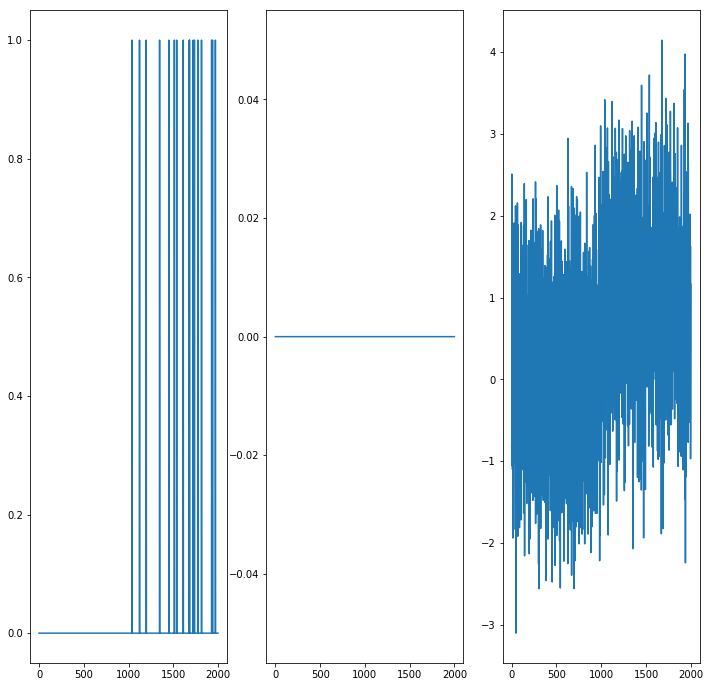

In [290]:
re=np.zeros(2000) 
for i,data in enumerate(np.hstack((train_data,test_data))): 
          re[i]=over_limit_identify(data,trained_model,method='over_range',percent=0.2) 
fig,axes = plt.subplots(1,3,figsize=(12,12))


filted_test_data = signal.medfilt(test_data,3)
re_filted = np.zeros(2000)
for i,data in enumerate(np.hstack((train_data,filted_test_data))): 
          re_filted[i]=over_limit_identify(data,trained_model,method='over_range',percent=0.2) 

axes[0].plot(re)
axes[1].plot(re_filted)
axes[2].plot(np.hstack((train_data,test_data)))



In [199]:
from scipy import stats  
his_data = np.random.randn(1000)
kde = stats.gaussian_kde(his_data)
# density = kde(0.5)
# print(density)
kde.inv_cov?

In [9]:
density = kde(-1)
density

array([0.2699284])

In [33]:
his_data = np.random.rand(10000)

trained_model = over_limit_calculate(his_data)

In [34]:
model = trained_model['model']


In [42]:
model(his_data.max())
his_var=np.var(his_data)
model(his_data.mean()+his_var)

array([0.2419978])

In [57]:
#  np.linspace(his_data.min(),his_data.max(),1000):
y = trained_model['model'](np.linspace(his_data.min(),his_data.max(),1000))
x= np.linspace(his_data.min(),his_data.max(),1000)

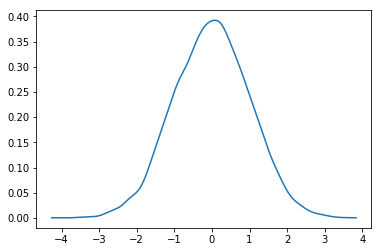

In [58]:
import matplotlib.pyplot as plt
plt.plot(x,y)

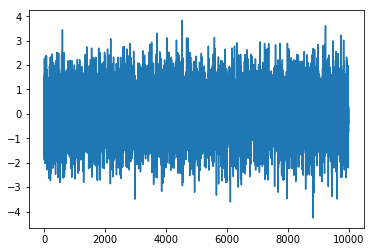

In [59]:
plt.plot(his_data)

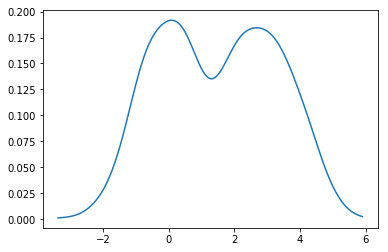

In [143]:
his_data2 = np.random.randn(1000)+3
his_data3 = np.hstack((his_data2.T,np.random.randn(1000).T))
trained_model2 = over_limit_calculate(his_data3)

y = trained_model2['model'](np.linspace(his_data3.min(),his_data3.max(),1000))
x= np.linspace(his_data3.min(),his_data3.max(),1000)
plt.plot(x,y)

# 采用凝聚聚类，测试数据分布是否为多类

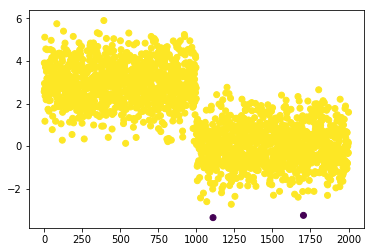

In [145]:
from sklearn.cluster import DBSCAN
dbcan = DBSCAN()
clusters =dbcan.fit_predict(his_data3.reshape(-1, 1))
pltdata = np.vstack((np.linspace(0,2000,2000),his_data3))
plt.scatter(np.linspace(0,2000,2000),his_data3,c = clusters)


In [129]:
np.unique(clusters).shape[0]>1

True

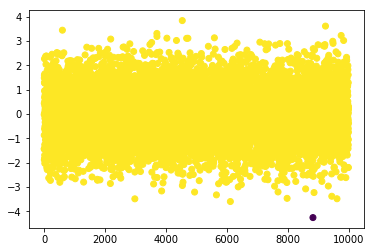

In [135]:
clusters =dbcan.fit_predict(his_data.reshape(-1, 1))
np.unique(clusters).shape[0]
plt.scatter(np.linspace(0,10000,10000),his_data,c = clusters)


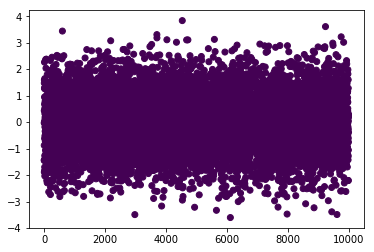

In [141]:
data_arranged = his_data.copy()
data_arranged[clusters==-1]=0
plt.scatter(np.linspace(0,10000,10000),data_arranged,c = dbcan.fit_predict(data_arranged.reshape(-1,1)))

In [165]:
trained_model['model'].

TypeError: integrate_kde() missing 1 required positional argument: 'other'

# 用silhouette coeffcient 评估聚类效果     效果不好!!

In [153]:
from sklearn.metrics.cluster import silhouette_score
score=[]
for i,es in enumerate(np.linspace(0,3,30)):
    data_test = np.random.randn(1000)+es
    data_test = np.hstack((data_test,np.random.randn(1000)))
    score.append(silhouette_score(data_test.reshape(-1,1),clusters))
    

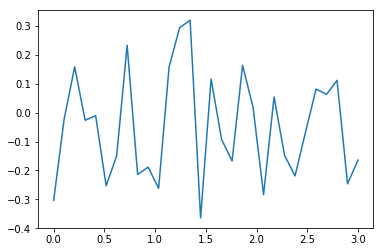

In [154]:
plt.plot(np.linspace(0,3,30),score)

# 核密度估计如果是常数型数据 会产生什么效果？


In [7]:
try:
    data = np.ones(1000)
    kde = stats.gaussian_kde(data)

    y = kde(np.linspace(-1,1,100))
    x= np.linspace(np.linspace(-1,1,100))
    plt.plot(x,y)
except :
    print("kde erro:{} is singular matrix".format('data'))


LinAlgError: singular matrix

In [210]:
   kde = stats.gaussian_kde(data)

LinAlgError: singular matrix